## Part- V, Comparing Regressors

## 5.1 Import libraries

In [ ]:
pip install lightgbm==3.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.3 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [ ]:
pip install lazypredict

In [ ]:
!pip install chembl_webresource_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
jsonschema 4.19.2 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.
referencing 0.30.2 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.


In [ ]:
!pip install chembl_webresource_client

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## 5.2 Loading dataset

In [ ]:
import pandas as pd

In [ ]:
data2= pd.read_csv("/content/RUNX1_bioactivity_class_2_pIC50_pubchem_fp.csv")
data2

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.65
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.26
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.44
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.26
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
90,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.89
91,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.44
92,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.00


In [ ]:
X= data2.drop('pIC50', axis=1)
Y= data2.pIC50

## 5.3 Data Preprocessing

In [ ]:
# Examine X dimension
X.shape

(94, 881)

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection= VarianceThreshold(threshold= (.8 * (1-.8)))
X= selection.fit_transform(X)
X.shape

(94, 182)

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size= 0.2, random_state= 42)

## 5.4 Compare ML algorithms

In [ ]:
# Define and builds the lazyclassifier
clf= LazyRegressor(verbose=0, ignore_warnings= True, custom_metric= None)
models_train, predictions_train= clf.fit(X_train, X_train, Y_train, Y_train)
model_test, predictions_test= clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:32<00:00,  1.28it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:20<00:00,  2.04it/s]


In [ ]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,14120203738608301089233024552779470263692542559...,-2060786491580670725481941449410509175686566497...,11667042844793482453102702608913530880.00,0.18
KernelRidge,26.16,-35.73,4.93,0.09
LassoCV,1.69,0.00,0.81,15.16
DummyRegressor,1.69,0.00,0.81,0.05
ElasticNet,1.69,0.00,0.81,0.03
ElasticNetCV,1.69,0.00,0.81,11.67
LassoLarsCV,1.69,0.00,0.81,0.09
LassoLars,1.69,0.00,0.81,0.03
Lasso,1.69,0.00,0.81,0.06


In [ ]:
# Performance table of the testing set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,63421093297431854009475059110714595021679792882...,-5778366278210458051506523084844725260841640645...,60173807905256707595061604009422803598481769784...,0.08
LinearRegression,231415550020557794705408.00,-2108452789076193225736192.00,1149441576928.46,0.02
TransformedTargetRegressor,231415550020557794705408.00,-2108452789076193225736192.00,1149441576928.46,0.04
KernelRidge,5.68,-41.63,5.17,0.02
GaussianProcessRegressor,4.81,-33.71,4.66,0.03
LinearSVR,1.37,-2.36,1.45,0.13
Ridge,1.22,-1.00,1.12,0.05
MLPRegressor,1.21,-0.95,1.10,0.51
HuberRegressor,1.21,-0.87,1.08,0.07


## **5.5 Data visualization of model performance**

[(0.0, 1.0)]

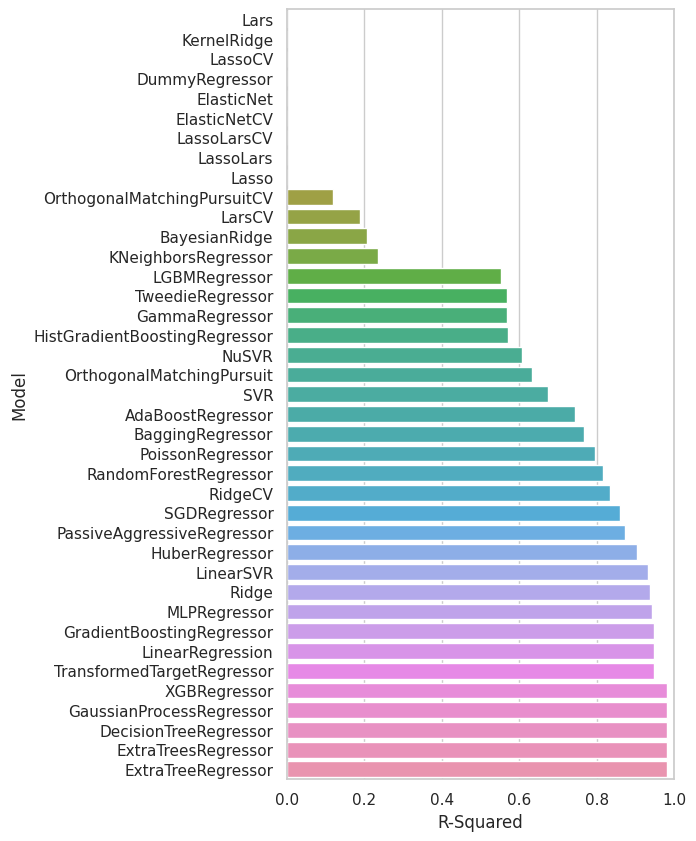

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns
# Train['R- Squared']= [0 if i <  0 else i for i in train.iloc[:,0]]
plt.figure(figsize=(5,10))
sns.set_theme(style='whitegrid')
ax= sns.barplot(y= predictions_train.index, x= 'R-Squared', data= predictions_train)
ax.set(xlim=(0, 1))

The highest R2 score can be seen in XGB and Decision Tree regressor whereas the lowest R2 score can be seen in LassoLars and ElasticNet regressors.

[(0.0, 10.0)]

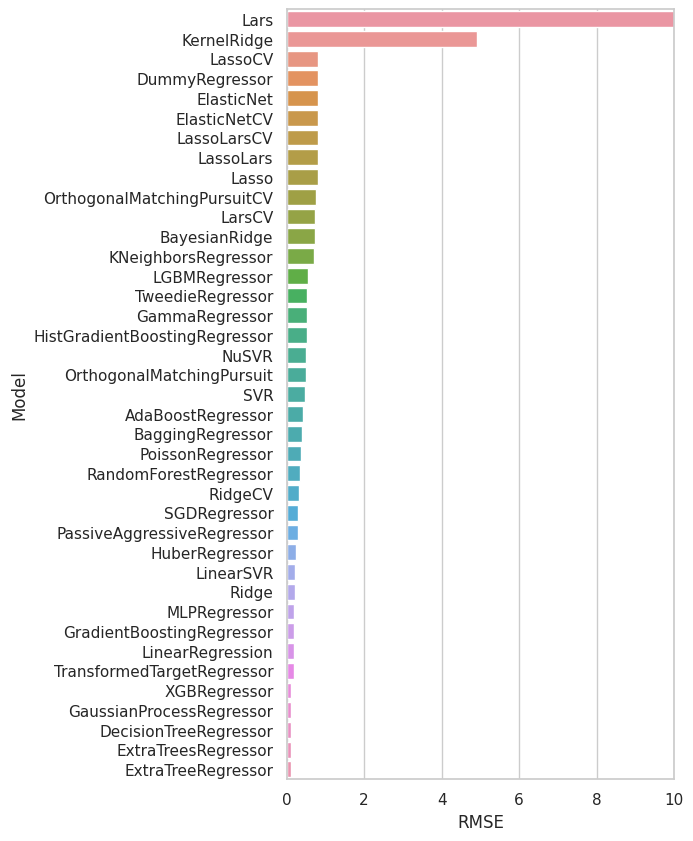

In [ ]:
# Bar plot of RMSE values
plt.figure(figsize=(5,10))
sns.set_theme(style='whitegrid')
ax= sns.barplot(y= predictions_train.index, x= 'RMSE', data= predictions_train)
ax.set(xlim=(0,10))

The highest RMSE score can be seen in Lars and KernelRidge regressors whereas, XGB and Decision Tree regressor has the lowest RMSE score.

[(0.0, 10.0)]

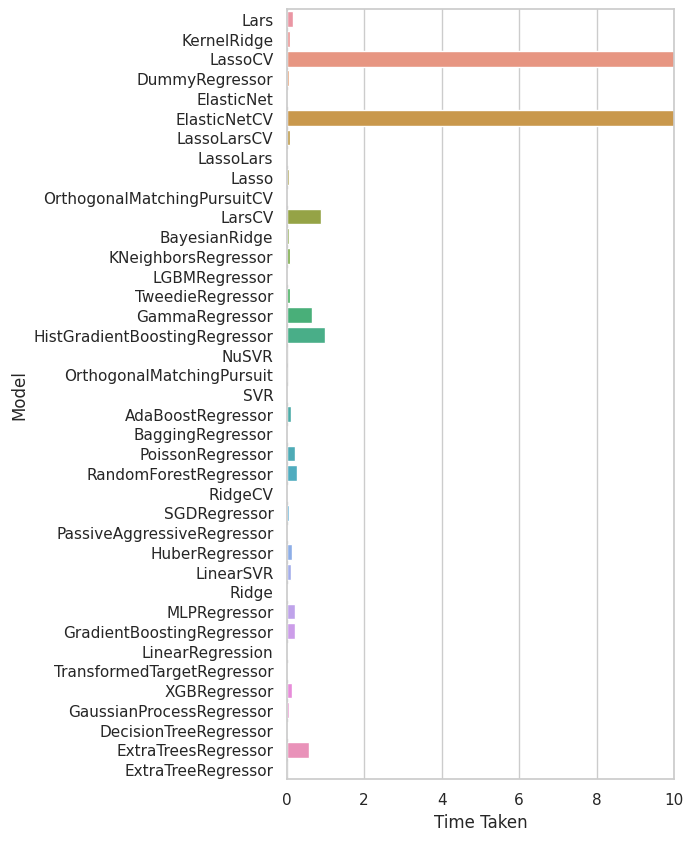

In [ ]:
# Bar plot of Calculation time
plt.figure(figsize=(5,10))
sns.set_theme(style='whitegrid')
ax= sns.barplot(y= predictions_train.index, x= 'Time Taken', data= predictions_train)
ax.set(xlim=(0,10))

LassoCV & ElasticNetCV has the higest calculation time when compared to other models.

After thorough evaluation, it has been observed that both XGBoost and Decision Tree regressors exhibit superior performance compared to other models. Additionally, Random Forest regressor also demonstrates favorable results. Consequently, we have decided to opt for Random Forest as our final model for deployment.